In [67]:
#Taller 1. Mecánica de Fluidos Ambiental
#Punto 2

In [68]:
import math 
import numpy as np
import pylab
from matplotlib import pyplot as plt 
%matplotlib inline

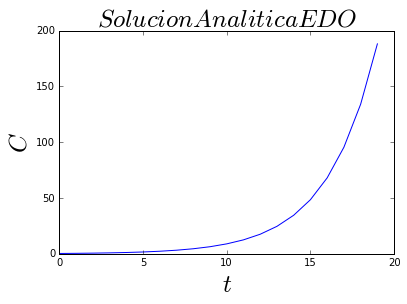

In [69]:
#Defino la solucion analìtica

t=np.arange(0,10,0.5)
c_0=0.3
k=0.678
C = c_0/np.exp(-k*t)
plt.plot(C)
plt.title(r'$Solucion Analitica EDO$',fontsize=25)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_solucion analitica_1.pdf") # Para guardar en disco la gráfica resultante
plt.show()

In [70]:
def met_euler(c0, t_final, dt, f):
    lista_t  = []
    lista_c = []
    c = c0
    t = 0.
    while t < t_final+dt: #incluir t_final
        lista_t.append(t)
        lista_c.append(c)
        c += dt * f(c,t)
        t += dt

    return lista_t, lista_c

def met_rk2(c0, t_final, h, f):
    lista_t  = []
    lista_c = []
    c = c0
    t = 0.
    
    while t < t_final+h:
        lista_t.append(t)
        lista_c.append(c)
        k1 = f(c,t)
        k2 = f(c + 0.5*h*k1, t+0.5*h)
        c += h * k2
        t += h
    return lista_t, lista_c

In [71]:
def met_rk4(c0, t_final, h, f):
    lista_t  = []
    lista_c = []
    c = c0
    t = 0.
    
    while t < t_final+h:
        lista_t.append(t)
        lista_c.append(c)
        k1 = f(c,t)
        k2 = f(c + 0.5*h*k1, t+0.5*h)
        k3 = f(c + 0.5*h*k2, t+0.5*h)
        k4 = f(c + h*k3, t+h)
        
        c += h/6. * (k1 + 2.*k2 + 2.*k3 + k4)
        t += h
    return lista_t, lista_c


In [72]:
#k=0.678, coeficiente de reacción
def EDO(c,t):
    return c*0.678

In [73]:
dt = 1
dt1=0.1
dt2=0.01
t_final = 5
c0 = 0.3

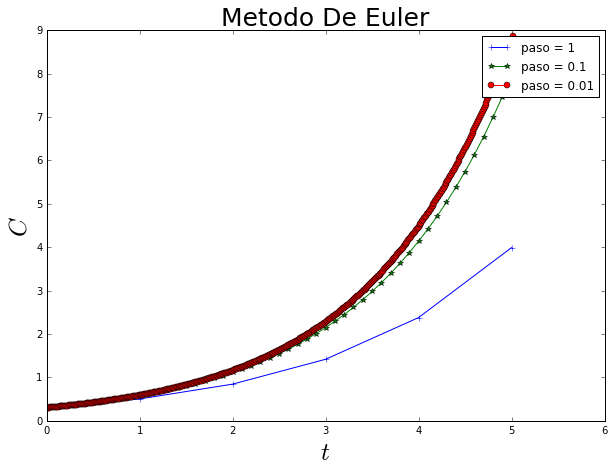

In [74]:
#Graficar Concentración vs Tiempo
plt.figure(figsize=(10,7))

t, c = met_euler(c0, t_final, dt, EDO)
t2, c2 = met_euler(c0, t_final, dt1, EDO)
t3, c3 = met_euler(c0, t_final, dt2, EDO)
plt.title(u"Metodo De Euler",fontsize=25)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_metodo de euler_1.pdf") # Para guardar en disco la gráfica resultante
plt.plot(t, c, '-+')
plt.plot(t2, c2, '-*')
plt.plot(t3, c3, '-o')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))


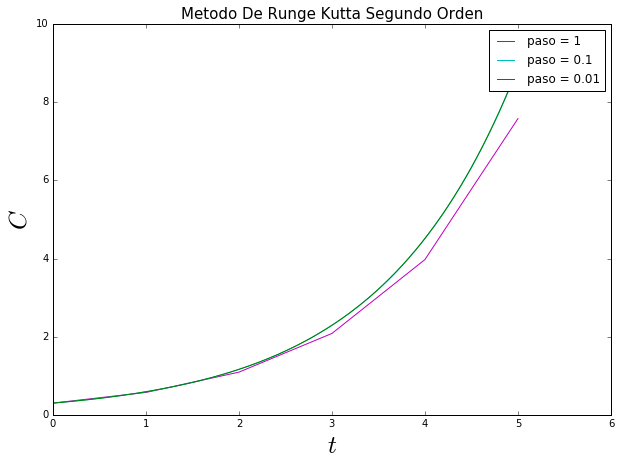

In [75]:
plt.figure(figsize=(10,7))
t_2, c_2 = met_rk2(c0, t_final, dt, EDO)
t2, c2 = met_rk2(c0, t_final, dt1, EDO)
t3, c3 = met_rk2(c0, t_final, dt2, EDO)
plt.title(u"Metodo De Runge Kutta Segundo Orden",fontsize=15)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_Metodo RK2_1.pdf") # guardar la gráfica resultante
plt.plot(t_2,c_2, "m")
plt.plot(t2, c2, 'c')
plt.plot(t3, c3, 'g')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))

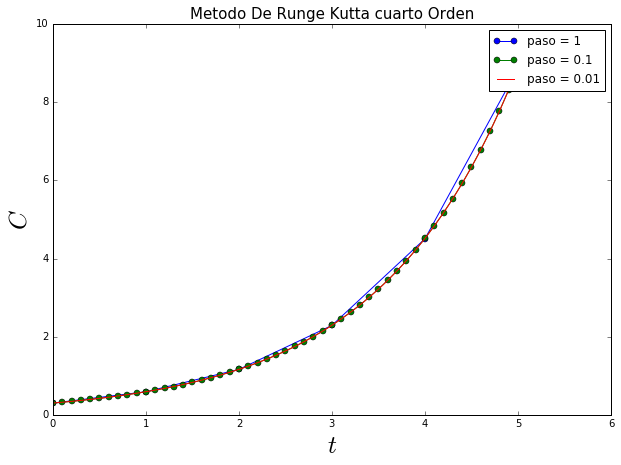

In [76]:
plt.figure(figsize=(10,7))
t, c = met_rk4(c0, t_final, dt, EDO)
t2, c2 = met_rk4(c0, t_final, dt1, EDO)
t3, c3 = met_rk4(c0, t_final, dt2, EDO)
plt.title(u"Metodo De Runge Kutta cuarto Orden",fontsize=15)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_Metodo RK4_1.pdf") # guardar la gráfica resultante
plt.plot(t,c, "ob-")
plt.plot(t2, c2, 'og-')
plt.plot(t3, c3, 'r')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))

In [77]:
#Segunda ecuación diferencial
#valores concentracion de entrada, caudal y constante de decaimiento, volumen de coltrol y carga
vc=float(3156600000)
Q=float(3156600000)
W=float(489780000)
k_t=0.23

In [80]:
t=np.arange(0,10,0.1)
c2_0=0.3
alpha=(Q/vc)+k_t
#C2 = c2_0 * np.exp(- alpha*t) + [(W/(vc*alpha)) * [1 - np.exp(-alpha*t)]]

In [81]:
#Solución a la ecuacion diferencial con los métodos propuestos
def EDO2(c,t):
    return (W/vc) - c*alpha

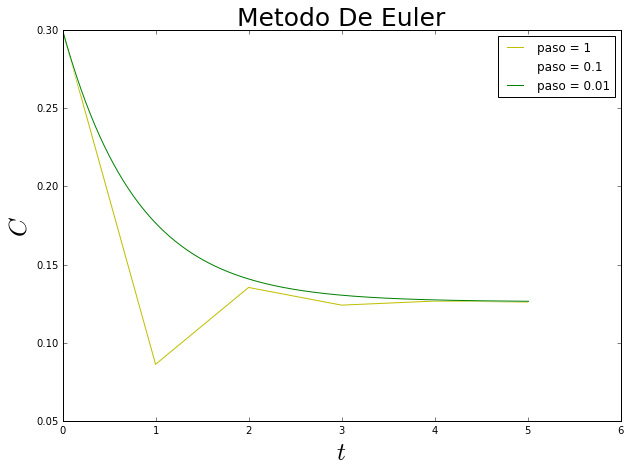

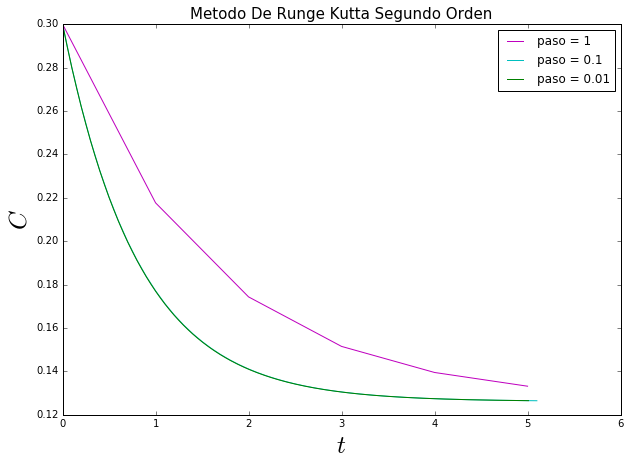

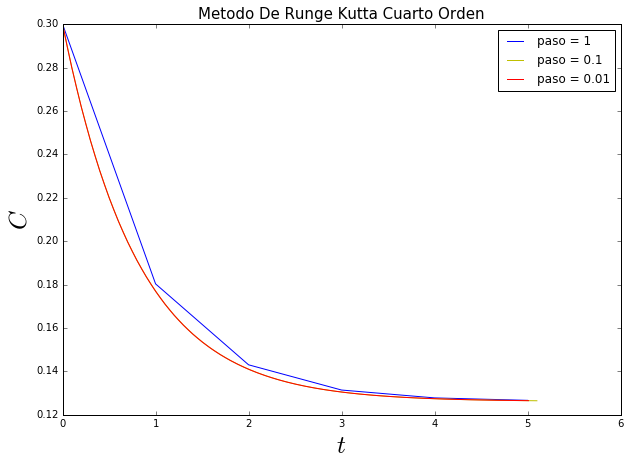

In [82]:
dt = 1
dt1=0.1
dt2=0.01
t_final = 5
c0 = 0.3

plt.figure(figsize=(10,7))
t, c = met_euler(c0, t_final, dt, EDO2)
t2, c2 = met_euler(c0, t_final, dt1, EDO2)
t3, c3 = met_euler(c0, t_final, dt2, EDO2)
plt.title(u"Metodo De Euler",fontsize=25)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_Metodo Euler_2.pdf") # guardar la gráfica resultante
plt.plot(t, c, 'y')
plt.plot(t2, c2, 'w')
plt.plot(t3, c3, 'g')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))

plt.figure(figsize=(10,7))
t, c = met_rk2(c0, t_final, dt, EDO2)
t2, c2 = met_rk2(c0, t_final, dt1, EDO2)
t3, c3 = met_rk2(c0, t_final, dt2, EDO2)
plt.title(u"Metodo De Runge Kutta Segundo Orden",fontsize=15)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_Metodo RK2_2.pdf") # guardar la gráfica resultante
plt.plot(t,c, "m")
plt.plot(t2, c2, 'c')
plt.plot(t3, c3, 'g')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))

plt.figure(figsize=(10,7))
t, c = met_rk4(c0, t_final, dt, EDO2)
t2, c2 = met_rk4(c0, t_final, dt1, EDO2)
t3, c3 = met_rk4(c0, t_final, dt2, EDO2)
plt.title(u"Metodo De Runge Kutta Cuarto Orden",fontsize=15)
plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$C$',fontsize=25)
plt.savefig("Fig_Metodo RK4_2.pdf") # guardar la gráfica resultante
plt.plot(t,c, "b")
plt.plot(t2, c2, 'y')
plt.plot(t3, c3, 'r')
plt.legend(('paso = 1','paso = 0.1','paso = 0.01'))